INICIANDO MODELO LSTM PARA IMPORTACIÓN

📂 Cargando datos de importación...
✅ Datos cargados exitosamente

🔧 Iniciando tuneo de parámetros...
Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\saram\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\saram\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\saram\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


c:\Users\saram\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\saram\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\saram\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\saram\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` arg


✅ Mejores parámetros: {'batch_size': 64, 'epochs': 50, 'model__dropout_rate': 0.2, 'model__learning_rate': 0.001, 'model__seq_length': 12, 'model__units': 100}
❇️ Mejor score (neg MSE): -0.011612618633937003
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0744 - val_loss: 0.0435
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0144 - val_loss: 0.0344
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0204 - val_loss: 0.0202
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0108 - val_loss: 0.0248
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0120 - val_loss: 0.0247
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0114 - val_loss: 0.0205
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0101 - val_loss: 0.0198
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0100 - val_loss: 0.0197
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0103 - val_loss: 0.0194
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37m

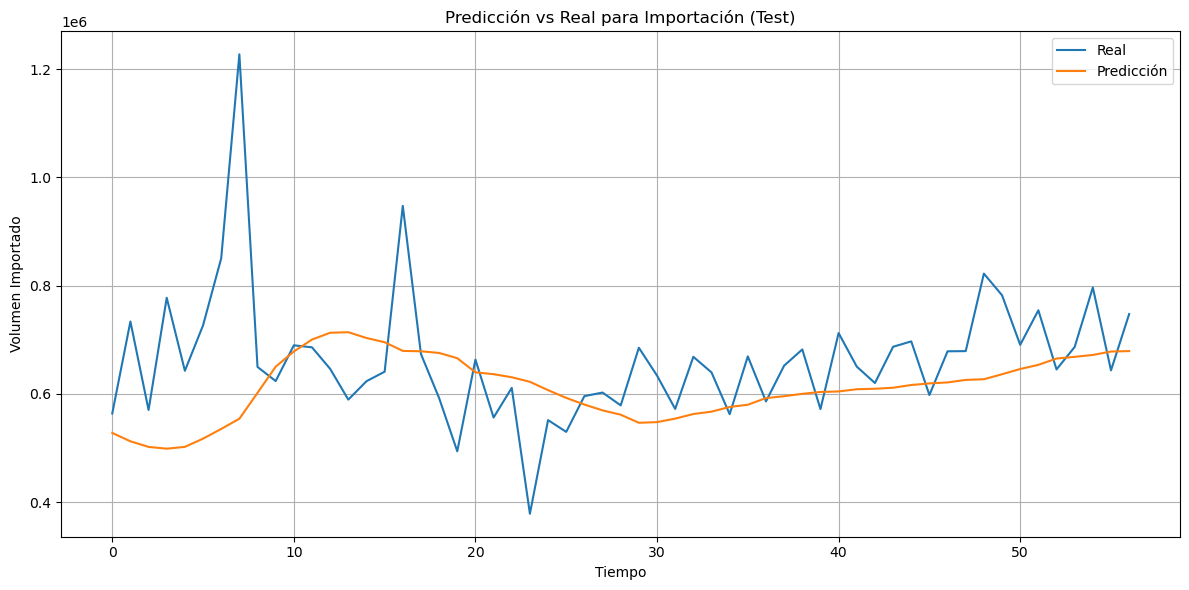

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


C:\Users\saram\AppData\Local\Temp\ipykernel_22752\596791362.py:160: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start='2025-08-01', periods=12, freq='M'), future_preds, label='Predicción 2025', color='red')


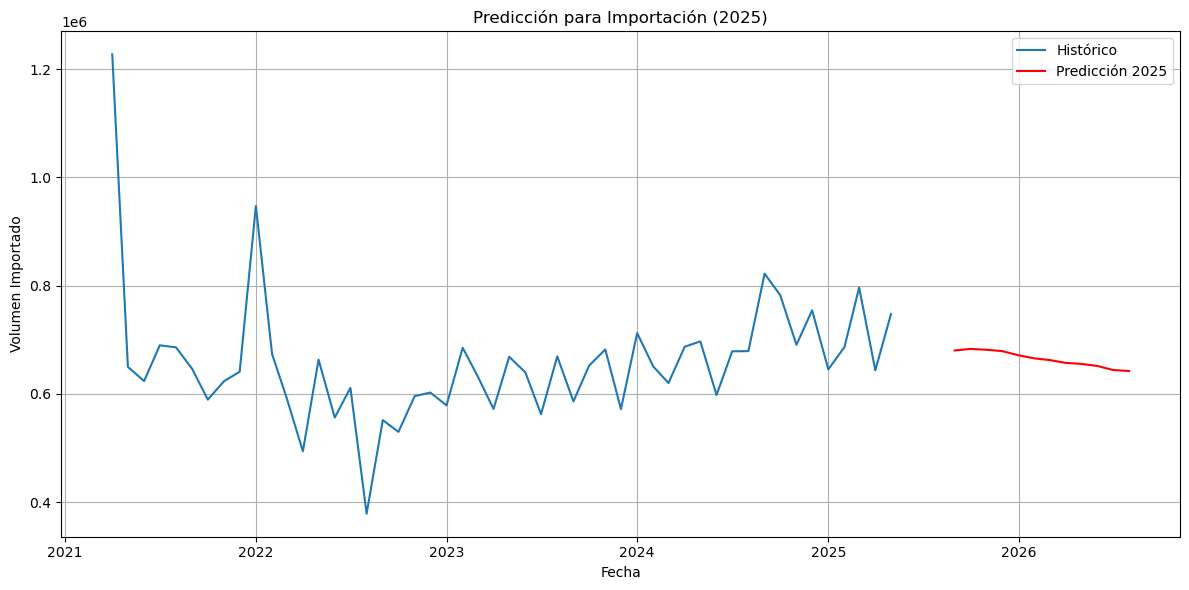

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt
import tensorflow as tf

# Configuración
plt.rcParams['figure.figsize'] = (12, 6)
pd.options.display.float_format = '{:,.2f}'.format

# Cargar datos
def cargar_datos():
    importacion_path = r'C:\Users\saram\OneDrive\Documents\GitHub\Series_de_Tiempo\importacion\IMPORTACION-HIDROCARBUROS-VOLUMEN-2024-2025.xlsx'
    importacion = pd.read_excel(importacion_path)
    
    # Normalizar nombres de columnas
    importacion.columns = importacion.columns.str.strip().str.lower()
    
    # Renombrar columnas clave
    rename_dict = {
        'gasolina regular': 'regular',
        'gasolina superior': 'superior',
        'diesel bajo azufre': 'diesel',
        'gas licuado de petróleo': 'glp'
    }
    importacion = importacion.rename(columns=rename_dict)
    
    # Limpieza de datos
    importacion['fecha'] = pd.to_datetime(importacion['fecha'], errors='coerce')
    importacion.dropna(subset=['fecha'], inplace=True)
    importacion.set_index('fecha', inplace=True)
    importacion.sort_index(inplace=True)
    
    return importacion

# Preparar datos para LSTM
def crear_secuencias(datos, seq_length):
    X, y = [], []
    for i in range(len(datos) - seq_length):
        X.append(datos[i:(i + seq_length)])
        y.append(datos[i + seq_length])
    return np.array(X), np.array(y)

# Crear modelo LSTM
def crear_modelo(units=50, dropout_rate=0.2, learning_rate=0.01, seq_length=12):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units//2))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

# Main
def main():
    print("="*50)
    print("INICIANDO MODELO LSTM PARA IMPORTACIÓN")
    print("="*50)
    
    # Cargar datos
    print("\n📂 Cargando datos de importación...")
    importacion = cargar_datos()
    if importacion.empty:
        print("❌ Error al cargar los datos")
        return
    
    print("✅ Datos cargados exitosamente")
    
    # Seleccionar columna y escalar
    data = importacion['superior'].dropna().values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)
    
    # Parámetros
    seq_length = 12  # Longitud de la secuencia (e.g., 12 meses)
    X, y = crear_secuencias(data_scaled, seq_length)
    
    # Dividir en train y test
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Tuneo de parámetros
    print("\n🔧 Iniciando tuneo de parámetros...")
    model = KerasRegressor(model=crear_modelo, verbose=0)
    param_grid = {
        'model__units': [50, 100],
        'model__dropout_rate': [0.2, 0.3],
        'model__learning_rate': [0.01, 0.001],
        'batch_size': [32, 64],
        'epochs': [50],
        'model__seq_length': [12]  # Añadido para pasar seq_length
    }
    tscv = TimeSeriesSplit(n_splits=3)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=1, error_score='raise')
    grid_result = grid.fit(X_train, y_train)
    
    print(f"\n✅ Mejores parámetros: {grid_result.best_params_}")
    print(f"❇️ Mejor score (neg MSE): {grid_result.best_score_}")
    
    # Entrenar modelo final
    best_model = crear_modelo(
        units=grid_result.best_params_['model__units'],
        dropout_rate=grid_result.best_params_['model__dropout_rate'],
        learning_rate=grid_result.best_params_['model__learning_rate'],
        seq_length=grid_result.best_params_['model__seq_length']
    )
    history = best_model.fit(X_train, y_train, 
                           epochs=grid_result.best_params_['epochs'],
                           batch_size=grid_result.best_params_['batch_size'],
                           validation_split=0.1,
                           verbose=1)
    
    # Predicciones
    y_pred = best_model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)
    
    # Métricas
    mae = mean_absolute_error(y_test_inv, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
    mape = np.mean(np.abs((y_test_inv - y_pred) / y_test_inv)) * 100
    print(f"\n📊 Métricas de error en test:")
    print(f"• MAE: {mae:.2f}")
    print(f"• RMSE: {rmse:.2f}")
    print(f"• MAPE: {mape:.2f}%")
    print(f"📝 Evaluación: Un MAPE < 10% indica alta precisión, > 20% sugiere ajustes.")
    
    # Gráfico
    plt.figure()
    plt.plot(y_test_inv, label='Real')
    plt.plot(y_pred, label='Predicción')
    plt.title('Predicción vs Real para Importación (Test)')
    plt.xlabel('Tiempo')
    plt.ylabel('Volumen Importado')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Predicción para 2025 (futuro)
    last_sequence = data_scaled[-seq_length:]
    future_preds = []
    current_sequence = last_sequence.copy()
    for _ in range(12):  # Predicción para los próximos 12 meses (2025)
        pred = best_model.predict(current_sequence.reshape(1, seq_length, 1))
        future_preds.append(pred[0, 0])
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = pred[0, 0]
    future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))
    
    plt.figure()
    plt.plot(importacion.index[-50:], scaler.inverse_transform(data_scaled[-50:]), label='Histórico')
    plt.plot(pd.date_range(start='2025-08-01', periods=12, freq='M'), future_preds, label='Predicción 2025', color='red')
    plt.title('Predicción para Importación (2025)')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen Importado')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()

In [3]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.
